Krista Miller \
Data Science Tools Assignment 2

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot 
import seaborn as sns

Question 1:
You are provided with the following training data set:

In [2]:
training = pd.read_csv('assignment2_training.csv')

display(training)

,refund,marital_status,income_above_80k,cheat
0,yes,single,yes,no
1,no,married,yes,no
2,no,single,no,no
3,yes,married,yes,no
4,no,divorced,yes,yes
5,no,married,no,no
6,yes,divorced,yes,no
7,no,single,yes,yes
8,no,married,no,no
9,no,single,yes,yes


The data is used to predict whether individuals will cheat in filing their taxes or not.  The attributes are: 'refund' (received tax refund: yes/no), 'marital_status' (married, single, divorced), 'income_above_80k' (income > 80k yes/no).  Output variable: 'cheat' (cheated on taxes: yes/no). 
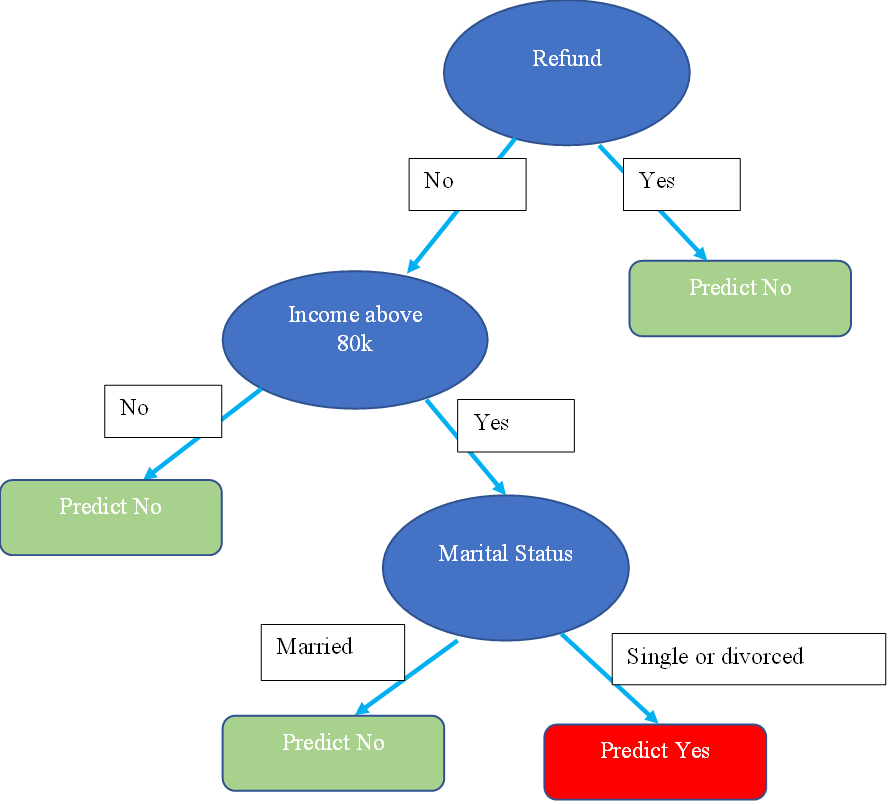

1a) Write an IF-THEN rule derived from this decision tree, that can be used to classify instances in the data.  Suppose your desire is to predict 'yes' of the output variable. 

IF Refund = "No" \
AND Income >80K = "Yes" \
AND Marital Status NOT EQUAL to "Married" \
THEN Predict Cheat = "Yes"

In [3]:
cheat = training[(training['refund'] == 'no') & (training['income_above_80k'] == 'yes') 
                 & (training['marital_status'] != 'married')]
print(cheat)

  refund marital_status income_above_80k cheat
4     no       divorced              yes   yes
7     no         single              yes   yes
9     no         single              yes   yes


1b) In code, create a function with an if-else statement to implement the rule you wrote above in question 1a.  You can name the function predict.  The function takes the input data and returns a vector of predicted output values.  You can decide if you want your function's input data argument to be a numpy array or a dataframe, then structure your function body to process the input data accordingly.  Provide some brief document of your function.  You can loop through each instance in the input data and assess whether the instance statisfies the rule for predicting 'yes' or not.  If the instance satisfies the rule for predicting 'yes', then predict 1, otherwise, predict 0. 

In [4]:
def predict(refund, marital_status, income_above_80k):
    '''if-else rules to predict whether an individual will cheat on taxes given refund, income, and marital status'''
    
    if refund == 'no':
        if marital_status != 'married':
            if income_above_80k == 'yes':
                return 1
    return 0

for index, row in training.iterrows():
    result = predict(row.refund, row.marital_status, row.income_above_80k)
    print(result)

0
0
0
0
1
0
0
1
0
1


1c) Create another function that implements the rule for predicting "yes" for the output, but this time, you will not use if-else statement or a loop.  Rather, use numpy arrays, matrices or vector to vectorize your code for faster and more efficient implementation.  If the instance satisfies the rule for predicting 'yes', then predict 1, otherwise, predict 0.  You can use logical operators for such implementation to compare values of test instances to values of attributes in the rule.  This function takes the input data and returns a vector of predicted values.  You can call this function vectorized_predict. 

In [5]:
def vectorized_predict(df):
    '''rules to predict whether an individual will cheat on taxes given refund, income, and marital status'''
    
    df['vectorized_predict'] = np.where(
        (df['refund'] == 'no') & (df['income_above_80k'] == 'yes') & (df['marital_status'] != 'married')
        , 1, 0)
    
    return df['vectorized_predict']

print(vectorized_predict(training).to_numpy())

[0 0 0 0 1 0 0 1 0 1]


1d) Select the input data (refund, marital_status, income_above_80k) in the training data and apply your predict function to the input data to predict the outcome values of the the input data.  Your function should return should return a vector of predicted values. 

In [6]:
predictions = training.apply(lambda row: predict(row['refund'], row['marital_status'], row['income_above_80k']), axis=1).to_numpy()
predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

1e) Select the input data (refund, marital_status, income_above_80k) in the training data and apply your vectorized_predict function to the input data to predict the outcome values of the input data.  Your function should return a vector of predicted values. Are the predicted values with the vectorized_predict function the same as the predicted values obtained through the predict function? (you should have the same results)

In [7]:
print(training.apply(vectorized_predict, axis=1))

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
dtype: object


1f) Include the predicted values as a column to the training data and name that column predicted_cheat

In [9]:
training['predicted_cheat'] = training.apply(vectorized_predict, axis = 1)
training

,refund,marital_status,income_above_80k,cheat,vectorized_predict,predicted_cheat
0,yes,single,yes,no,0,0
1,no,married,yes,no,0,0
2,no,single,no,no,0,0
3,yes,married,yes,no,0,0
4,no,divorced,yes,yes,1,1
5,no,married,no,no,0,0
6,yes,divorced,yes,no,0,0
7,no,single,yes,yes,1,1
8,no,married,no,no,0,0
9,no,single,yes,yes,1,1


1g) Create a function that computes the overall accuracy of the classification.  You can call this function overall_accuracy.  The function should take two arguments, a vector of actual output values and a vector of predicted output values, then returns the classification accuracy.  Inside the function, you can use boolean logic to compare the actual and predicted values, then count the proportion of how many predicted values are equal to the actual values to get the overall accuracy.

In [10]:

def overall_accuracy(actual_outputs, predicted_outputs):
    actual = pd.Series(actual_outputs)
    prediction = pd.Series(predicted_outputs)
    df=pd.concat([actual,prediction],axis=1)
    df2 = df[((df['cheat'] == 'yes') & (df['predicted_cheat'] == 1))]
    df3 = df[((df['cheat'] == 'no') & (df['predicted_cheat'] ==0))]
    correct = len(df2) + len(df3)
    return((correct)/len(df) *100)

overall_accuracy(training.cheat, training.predicted_cheat)


100.0

1h) Create a confusion matrix using the predicted and actual output values.  You can use pandas crosstab function. 

In [11]:
training['cheat_encoded'] = pd.Series(np.where(training.cheat == 'yes', 1, 0), dtype=int)
training['predicted_cheat']= pd.Series(np.where(training.predicted_cheat == 1, 1, 0), dtype=int)

display(pd.crosstab(training['predicted_cheat'], training['cheat_encoded'], rownames=['Actual'], colnames=['Predicted'], margins= True))

Predicted,0,1,All
Actual,,,
0,7,0,7
1,0,3,3
All,7,3,10


1i) Suppose the test set data as follows.  Apply the vectorized_predict function to the input of the test dataset to predict the output values for the test dataset.  Include these predicted values as a column to the test dataset and called this column predicted_cheat. 

In [12]:
test = pd.read_csv('assignment2_test.csv')
vectorized_predict(test)
test = test.rename(columns={"vectorized_predict": "predicted_cheat"})
display(test)

,refund,marital_status,income_above_80k,cheat,predicted_cheat
0,no,single,yes,no,1
1,no,single,yes,no,1
2,no,married,yes,no,0
3,no,divorced,no,no,0
4,no,married,yes,no,0
5,no,single,yes,no,1
6,yes,single,yes,no,0
7,no,single,yes,yes,1
8,yes,married,yes,yes,0
9,yes,single,no,yes,0


1j) Apply the overall_accuracy function to the predicted out values and actual output values of the test set to compute the overall accuracy.  Compare the overall accuracy of the test set and that of the training set.  Is there overfitting?  Why or why not?  If there is overfitting, what would you do to avoid overfitting the rule to the training set?

In [13]:
overall_accuracy(test.cheat, test.predicted_cheat)

#is there overfitting?  why or why not?  if there is overfitting, what would you do to avoid overfitting the rule to 
# the training set?

#Yes, there is overfitting because we are training the model on the entire training set with all the variables.
#To avoid overfitting the rule to the training set, we can use a bootstrapping technique to pull random samples from 
#the training data with replacement.  Or, we could remove variables to reduce the complexity of the model.

50.0

Question 2: 
You will use the same training dataset provided in question 1.  Suppose we wanted to create one rule using only one attribute that best classifies the input data, you will need to write a function or an algorithm to find that best attribute.  There are different approaches we can use to evaluate the best attribute that will classify our data with the highest accuracy.  One of the accuracy measures we can use to find the best attributes is information gain, which uses entropy. 

a) given the training dataset in question 1, write a function that computes the entropy of output variable. The function should take the entire training dataset, and the name of the output variable as arguments and return the entropy value. You can call the function, entropy. 
Note that entropy H(S) of the target variable T with possible values C_i for a set of S examples is given by:
H(S) = - ∑_(i=1)^c▒p_i   log_2⁡〖p_i 〗 
where p_i  is proportion of class c_i  in the S examples 

Alternatively, you could also define entropy for a binary target variable as:
 
Where p = proportion of the desired class or proportion of “yes” in the given data. 

Apply the entropy function to the training dataset to compute the entropy. Do you think the data is more pure, less pure or more/less pure?

In [14]:
def entropy(df_column):
    '''calculate entropy given a pandas series'''
    entropy_value = 0
    values = df_column.unique()
    for value in values:
        proportion = df_column.value_counts()[value]/len(df_column)
        entropy_value += proportion*np.log2(proportion)
    return -entropy_value

print(entropy(training['cheat']))

# The value of 0.88 is the measurement of uncertainty.  Because entropy for binary values is between 0 and 1,
# a value of 0.88 means that the entropy is high, and indicating a low level of purity.

0.8812908992306927


2b) Create another function that takes the dataset, the name of the output variable, and a specific input variable as arguments and returns the information gain for a split of the data on that specific input variable.  You can call the function, information_gain.  Information gain is defined as:
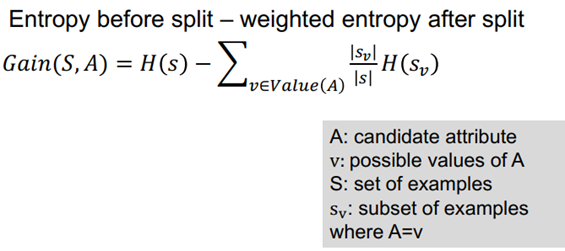
Apply the information_gain function to each input variable to compute the information gain for each input variable.  Which input variables is the best (has the highest information gain) for creating one-rule?

In [15]:
def information_gain(data, split_feature, target_feature):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    original_entropy = entropy(data[target_feature])
    
    values = data[split_feature].unique()    #bin counts?
    
    to_subtract = 0
    for i in range(len(values)):
        subset = data[data[split_feature] == values[i]]
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * entropy(subset[target_feature])
    
    return original_entropy - to_subtract


refund_infogain = information_gain(training, "refund", "cheat")
marriage_infogain = information_gain(training,  "marital_status", "cheat")
income_infogain = information_gain(training,  "income_above_80k", "cheat")

print("refund variable information gain = ", refund_infogain)
print("marital status variable information gain = ", marriage_infogain)
print("income > 80k variable information gain = ", income_infogain)

print("Input variable with highest information gain = marital status")

refund variable information gain =  0.19163120400671663
marital status variable information gain =  0.2812908992306926
income > 80k variable information gain =  0.19163120400671663
Input variable with highest information gain = marital status


2c) Do a cross tabulation using the best attribute obtained in 2b above and the output variable in the training dataset. 

In [16]:
#marital status has highest information gain

pd.crosstab(training['marital_status'], training['cheat'])

cheat,no,yes
marital_status,,
divorced,1,1
married,4,0
single,2,2


2d) Draw a decision tree (use shapes in the word document) to show how the best variable can be used for classification.  This is a decision tree with a single node or single variable. 

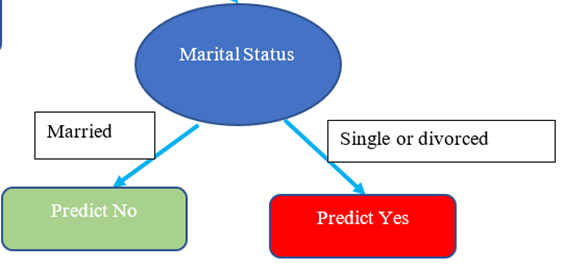


2e) Create a one-rule from the decision tree in 2d.  The rule should contain an antecedent and a consequent.  The antecedent should use only the best attribute and its value or values.

IF Marital Status != Married \
THEN predict Yes \
ELSE predict No

2f) Using the antecedent of your rule, extract the data covered by the rule and compute the coverage of the rule. 
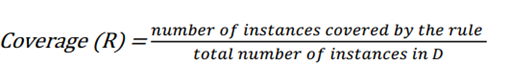

Coverage = 3 instances covered by the rule/6 number of instances in D; 
Therefore coverage = 50%

2g) Using the antecedent and precedent of your rule, extract the data covered by the rule and compute the accuracy of the rule. 
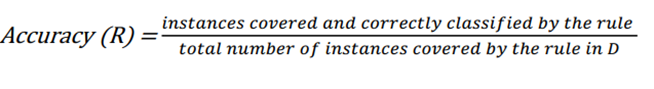

In [19]:
print("accuracy(R):", len(training[(training.marital_status != 'married') & (training.cheat == 'yes')])/len(training[training['marital_status'] == 'married']) * 100)

accuracy(R): 75.0


2h) Create a function that implements the rule as an if-else statement to predict the outcomes of any instance (a vector of values associated with the input variables for a specific individual).  The function should be able to take one or more instances as an argument in the form of a dataframe or a numpy array. 

In [20]:
def oneR(marital_status):
    '''if-else rules to predict whether an individual will cheat on taxes given one rule: marital status'''
    if marital_status != 'married':
        return 1
    return 0

2i) Implement the function on the training set and test set in question 1 to get the predicted outputs for the training set and test set. 

In [21]:
training_pred_outputs = list()
for index, row in training.iterrows():
    result = oneR(row.marital_status)
    training_pred_outputs.append(result)
    
print(training_pred_outputs)
training['oneRule_outputs'] = training_pred_outputs

test_pred_outputs = list()
for index, row in test.iterrows():
    result = oneR(row.marital_status)
    test_pred_outputs.append(result)
    
print(test_pred_outputs)
test['oneRule_outputs'] = test_pred_outputs

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1]


2j) What is the overall prediction accuracies for the training set and test set?  You can use the overall_accuracy function you initially defined.

In [22]:
def overall_accuracy_or(actual_outputs, predicted_outputs):
    actual = pd.Series(actual_outputs)
    prediction = pd.Series(predicted_outputs)
    df=pd.concat([actual,prediction],axis=1)
    df2 = df[((df['cheat'] == 'yes') & (df['oneRule_outputs'] == 1))]
    df3 = df[((df['cheat'] == 'no') & (df['oneRule_outputs'] ==0))]
    correct = len(df2) + len(df3)
    return((correct)/len(df) *100)

print(f'overall prediction accuracy training set: {overall_accuracy_or(training.cheat, training.oneRule_outputs)}')
print(f'overall prediction accuracy test set: {overall_accuracy_or(test.cheat, test.oneRule_outputs)}')

overall prediction accuracy training set: 70.0
overall prediction accuracy test set: 40.0


2k) Do you think there is overfitting or underfitting? Why or why not?

There is underfitting to the dataset because the one rule is performing poorly on both the training set and the test set. It is not accurately classifying the cases of unmarried people who do not cheat in the training set, so the rule cannot be generalized to the test set. 